In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.display import HTML
from IPython.core.display import Image
from datetime import datetime

from scipy import stats as ss
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('datasets/kc_house_data.csv')

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
jupyter_settings()

def cramer_v(x, y):
    cm = pd.crosstab(x,y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / (min(kcorr - 1, rcorr - 1)))


pd.set_option('display.float_format', lambda x: '%.5f' % x)

Populating the interactive namespace from numpy and matplotlib


# Data Description

In order to better understand the data it is good practice to conduct a basic data description. This way we can ensure we have relevant data for its best utilization. Performing an Exploratory Data Analysis allows for the determination of possible relationship between the different attributes.

In [3]:
print(f'Dataframe Rows: {data.shape[0]}')
print(f'Dataframe Columns: {data.shape[1]}')

Dataframe Rows: 21613
Dataframe Columns: 21


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


## Changing Data Types

In [9]:
data['date'] = pd.to_datetime(data['date'])

## Describing data

In [10]:
num_attributes = data[['price', 'sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
cat_attributes = data[['date','bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]

# ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#        'lat', 'long', 'sqft_living15', 'sqft_lot15']

### Numerical Attributes

In [11]:
# Central Tendency
ct1 = pd.DataFrame( num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply(np.median)).T

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( np.std)).T
d2 = pd.DataFrame( num_attributes.apply( np.min)).T
d3 = pd.DataFrame( num_attributes.apply( np.max)).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

# bringing all together
m = pd.concat ( [d2, d3,d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min','max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.00000,7700000.00000,7625000.00000,540088.14177,450000.00000,367118.70318,4.02407,34.58554
1,sqft_living,290.00000,13540.00000,13250.00000,2079.89974,1910.00000,918.41965,1.47156,5.24309
2,sqft_lot,520.00000,1651359.00000,1650839.00000,15106.96757,7618.00000,41419.55327,13.06002,285.07782
3,sqft_above,290.00000,9410.00000,9120.00000,1788.39069,1560.00000,828.07182,1.44666,3.40230
4,sqft_basement,0.00000,4820.00000,4820.00000,291.50905,0.00000,442.56480,1.57797,2.71557
5,sqft_living15,399.00000,6210.00000,5811.00000,1986.55249,1840.00000,685.37545,1.10818,1.59710
6,sqft_lot15,651.00000,871200.00000,870549.00000,12768.45565,7620.00000,27303.54796,9.50674,150.76311


Text(0.5, 1.0, 'sqft_basement')

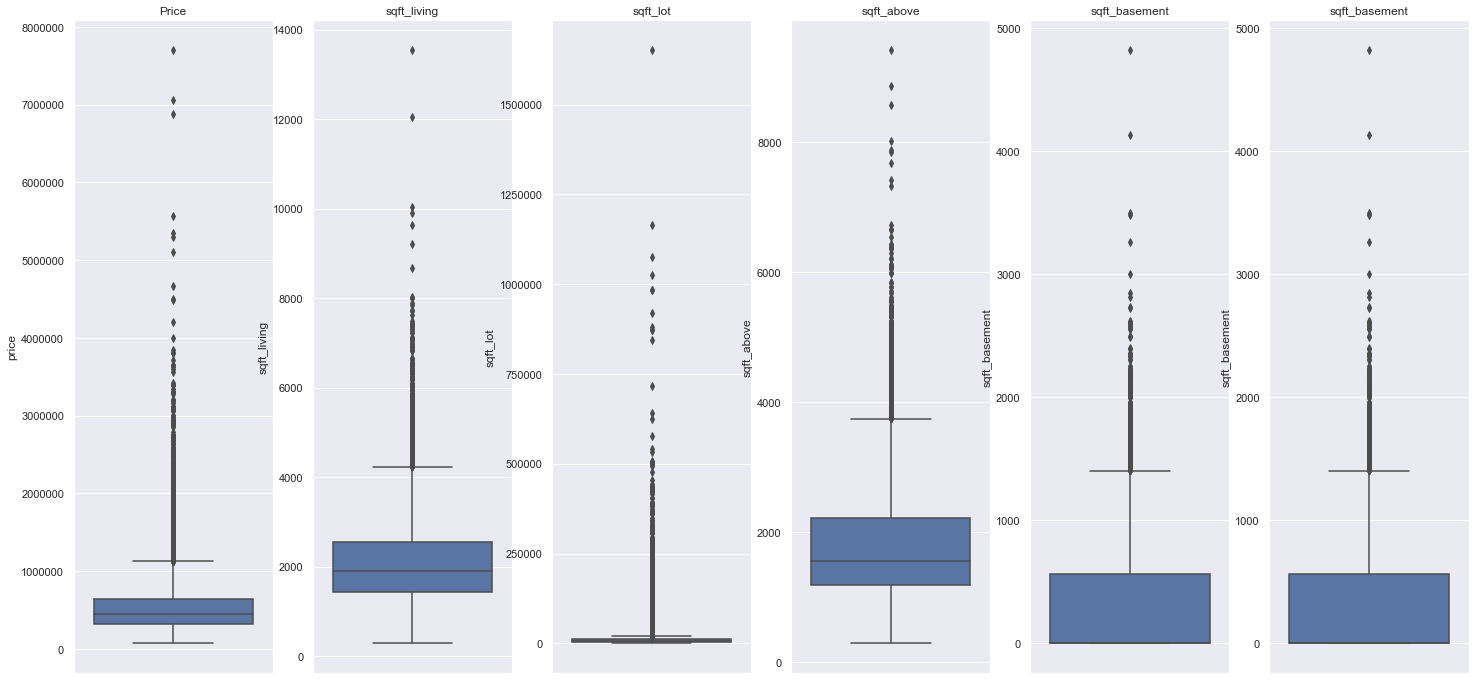

In [12]:
plt.subplot(1,6,1)
sns.boxplot( y = 'price' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Price')

plt.subplot(1,6,2)
sns.boxplot( y = 'sqft_living' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_living')

plt.subplot(1,6,3)
sns.boxplot( y = 'sqft_lot' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_lot')

plt.subplot(1,6,4)
sns.boxplot( y = 'sqft_above' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_above')

plt.subplot(1,6,5)
sns.boxplot( y = 'sqft_basement' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_basement')

plt.subplot(1,6,6)
sns.boxplot( y = 'sqft_basement' , data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.title('sqft_basement')


### Categories

In [13]:
cat_attributes.shape

(21613, 15)

In [14]:
cat_attributes.apply(lambda x: x.unique().shape[0])

date              372
bedrooms           13
bathrooms          30
floors              6
waterfront          2
view                5
condition           5
grade              12
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

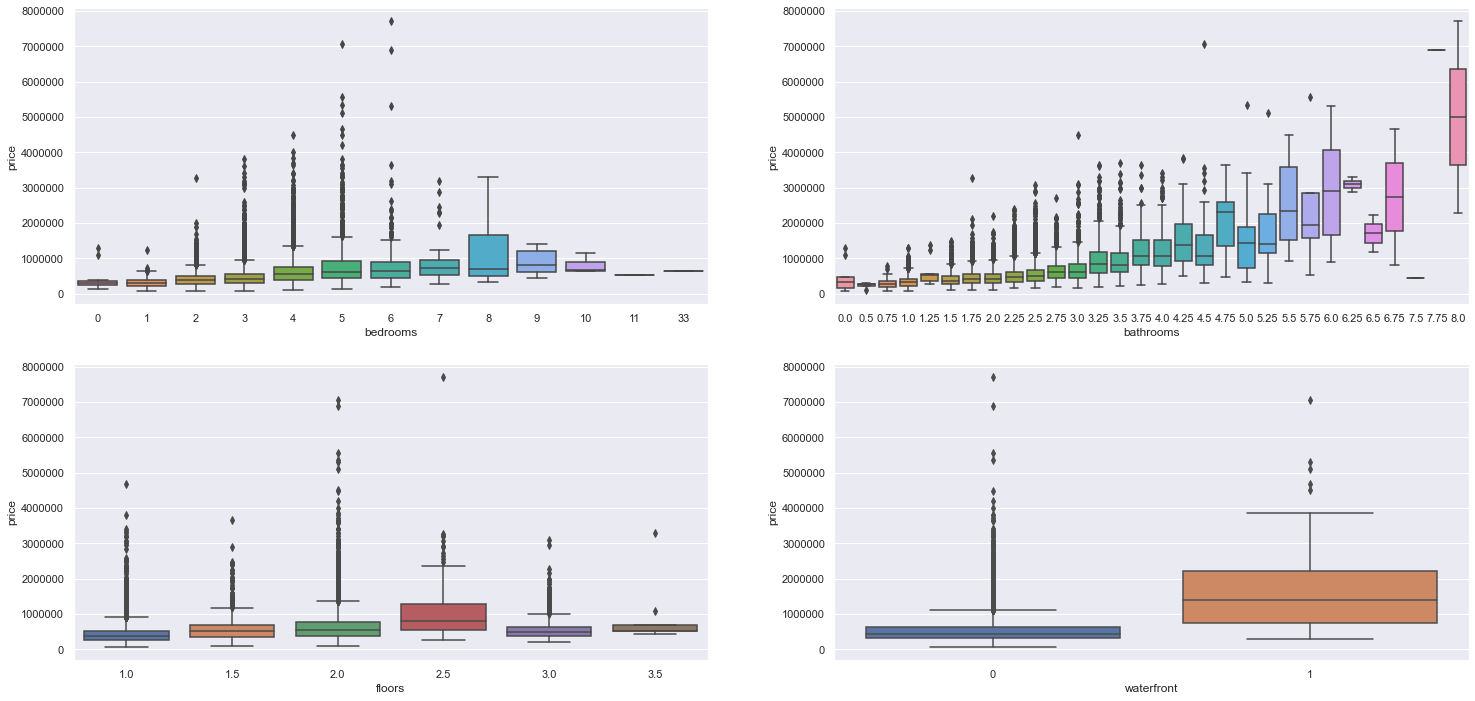

In [15]:
plt.subplot(2,2,1)
sns.boxplot( x = 'bedrooms', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,2)
sns.boxplot( x = 'bathrooms', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,3)
sns.boxplot( x = 'floors', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,4)
sns.boxplot( x = 'waterfront', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')






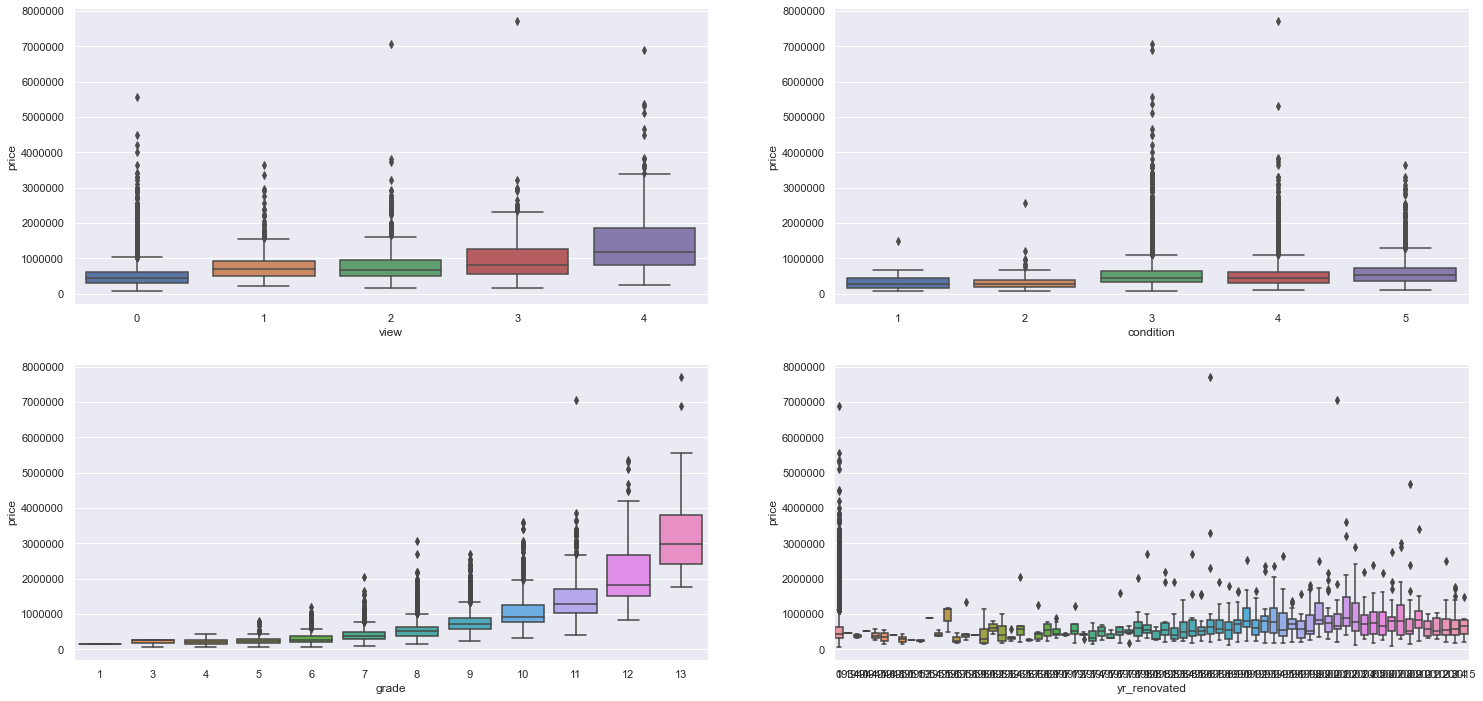

In [16]:
plt.subplot(2,2,1)
sns.boxplot( x = 'view', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,2)
sns.boxplot( x = 'condition', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,3)
sns.boxplot( x = 'grade', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(2,2,4)
sns.boxplot( x = 'yr_renovated', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')

In [17]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
# aux_data_pivot = data[['lat','long','price']].reset_index()
# data_pivot = pd.pivot_table(aux_data_pivot, index = 'lat', columns = 'long', values = 'price', aggfunc='mean')
# # df.pivot_table(index='team', columns='position', values='points', aggfunc='sum')
# sns.heatmap(data_pivot)

# Filters

In [20]:
# House with 33 bedrooms inside a 6000 sqft lot, with 1 floor - drop it.
data[data['bedrooms'] == 33]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.00000,33,1.75000,1620,6000,1.00000,0,0,5,7,1040,580,1947,0,98103,47.68780,-122.33100,1330,4700


In [21]:
data.drop(data.index[15870], inplace = True)


In [22]:
data[data['bedrooms'] == 33]
data.shape

(21612, 21)

# Features

In [23]:
# sqft price 
data['aux_sqft_living_price'] = data['price'] / data['sqft_living']


In [24]:
# Hypothesis

# Exploring Data

## Univariate

### Response Variable

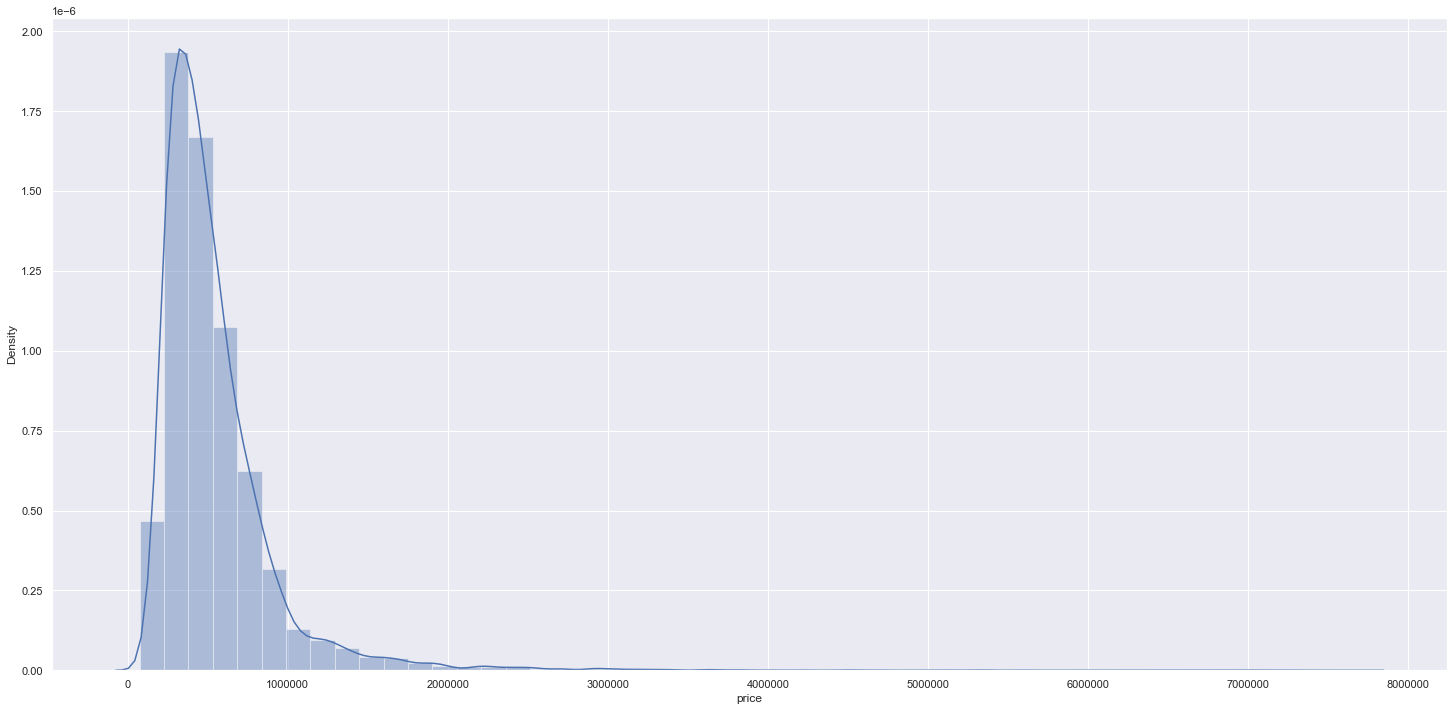

In [25]:
sns.distplot(data.price)
plt.ticklabel_format(style='plain', axis='x')

### Numerical variables

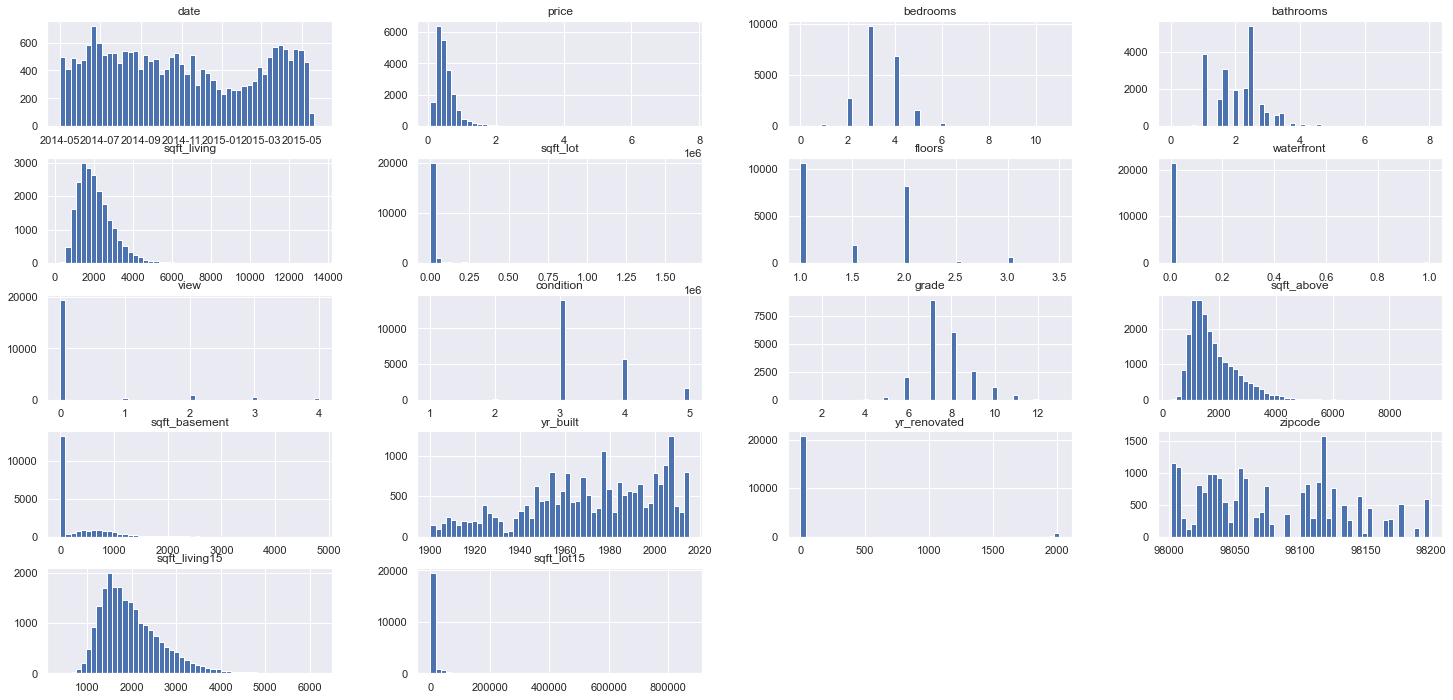

In [26]:
# Data overview
aux_hist = data[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15']]
aux_hist.hist(bins = 50);

### Categorical Attributes

In [27]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'aux_sqft_living_price'],
      dtype='object')

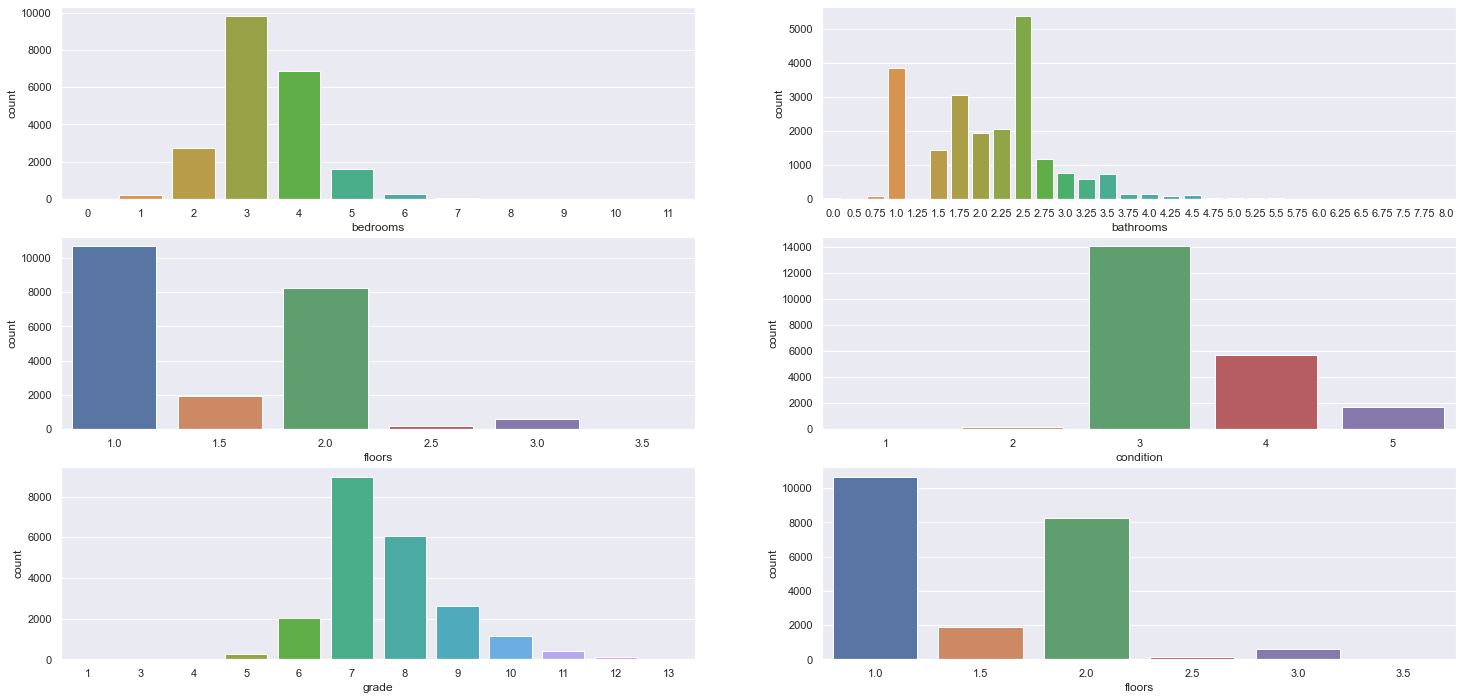

In [28]:
plt.subplot(3, 2, 1);
sns.countplot(data['bedrooms']);
plt.subplot(3, 2, 2);
sns.countplot(data['bathrooms']);
plt.subplot(3, 2, 3);
sns.countplot(data['floors']);
plt.subplot(3, 2, 4);
sns.countplot(data['condition']);
plt.subplot(3, 2, 5);
sns.countplot(data['grade']);
plt.subplot(3, 2, 6);
sns.countplot(data['floors']);

## Bivariate

### The square foot of newer houses are more expensive

<AxesSubplot:>

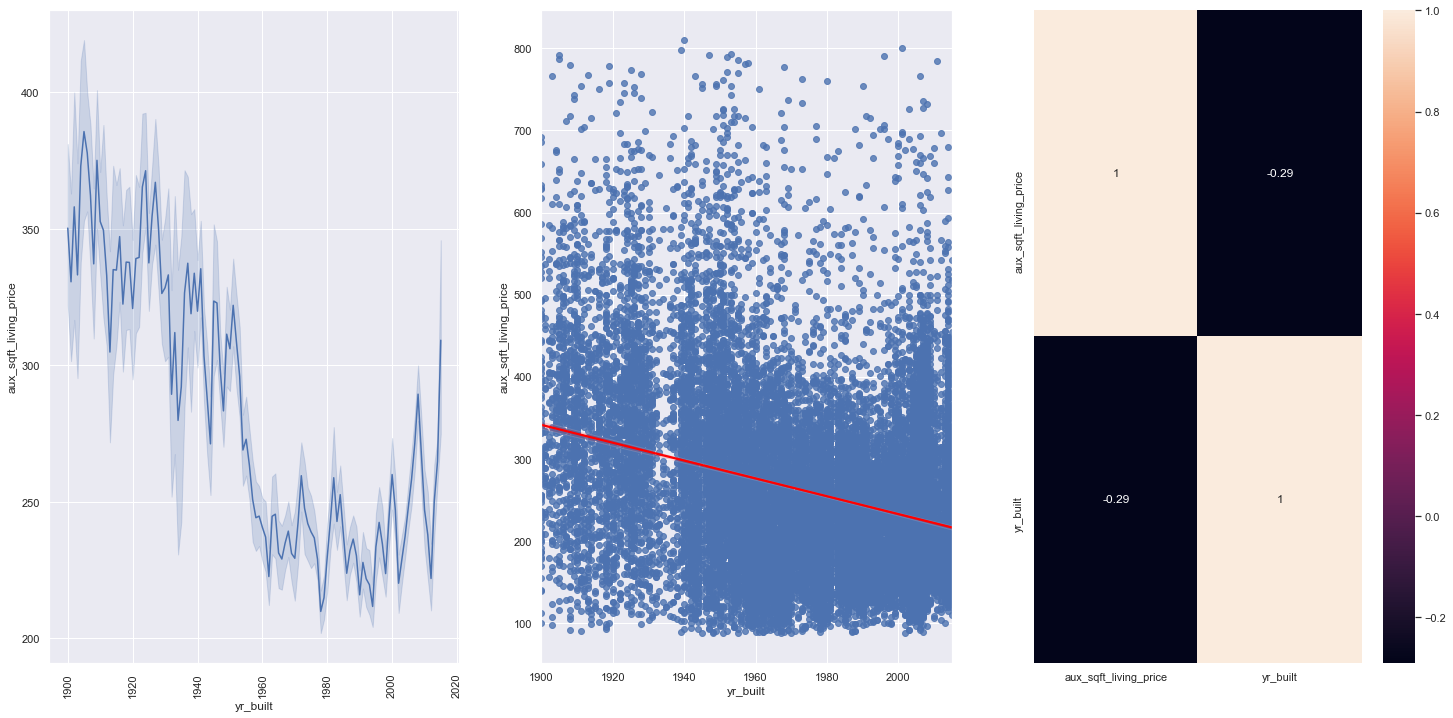

In [29]:
# The square foot of newer houses are more expensive

# data[['price','yr_built']]

plt.subplot(1, 3, 1)
sns.lineplot( x = 'yr_built', y = 'aux_sqft_living_price', data = data)
plt.xticks(rotation = 90);

plt.subplot(1, 3, 2)
sns.regplot( x = 'yr_built', y = 'aux_sqft_living_price',line_kws={"color": "red"}, data = data)

plt.subplot(1, 3, 3)
aux_corr = data[['aux_sqft_living_price','yr_built']]
sns.heatmap(aux_corr.corr(method = 'pearson'), annot = True)

# Not necessarily true, they tend to be cheaper.

### Cheaper properties are easier to resell:

Q1: 321837.5
Median: 540083.5187858597
Q3: 645000.0


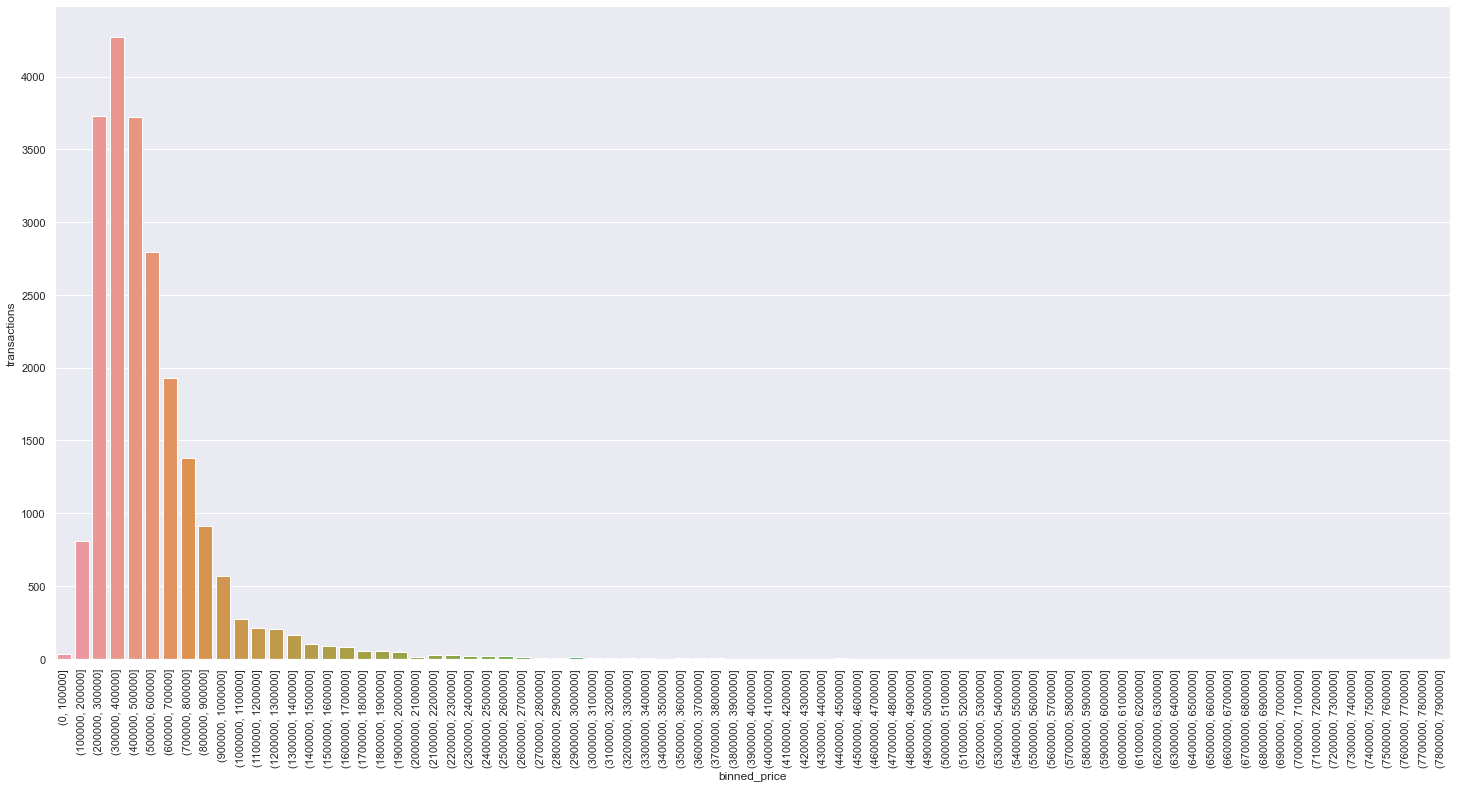

In [30]:
# Cheaper properties are easier to resell:
print('Q1: ' + str(data.price.quantile(.25)))
print('Median: ' + str(data.price.mean()))
print('Q3: ' + str(data.price.quantile(.75)))

bins = list(range(0,8000000,100000))
data['binned_price'] = pd.cut(data['price'], bins=bins)

data.head(20)

bin_price_number_transactions = data[['price','binned_price']].groupby('binned_price').count().reset_index()
bin_price_number_transactions.rename(columns = {'price':'transactions'}, inplace = True)

sns.barplot(x = 'binned_price', y = 'transactions', data=bin_price_number_transactions)
plt.xticks(rotation = 90);



# Assuming cheaper properties as the properties between the first quantile and the second:





([<matplotlib.patches.Wedge at 0x22fcc50c700>,
 [Text(-0.13414092179140155, 1.0917903704928675, 'Up to 200.000'),
  Text(-0.8498838722804465, -0.8471702329742199, '200.000 to 600.000'),
  Text(1.0701606036177715, 0.25447255738968605, '600.000 to 800.000'),
  Text(0.4566524360637974, 1.0007340069354091, 'Over 800.000')],
 [Text(-0.07316777552258266, 0.5955220202688368, '3.9%'),
  Text(-0.4957655921635938, -0.4941826359016282, '67.2%'),
  Text(0.5837239656096934, 0.13880321312164692, '15.3%'),
  Text(0.24908314694388947, 0.5458549128738595, '13.6%')])

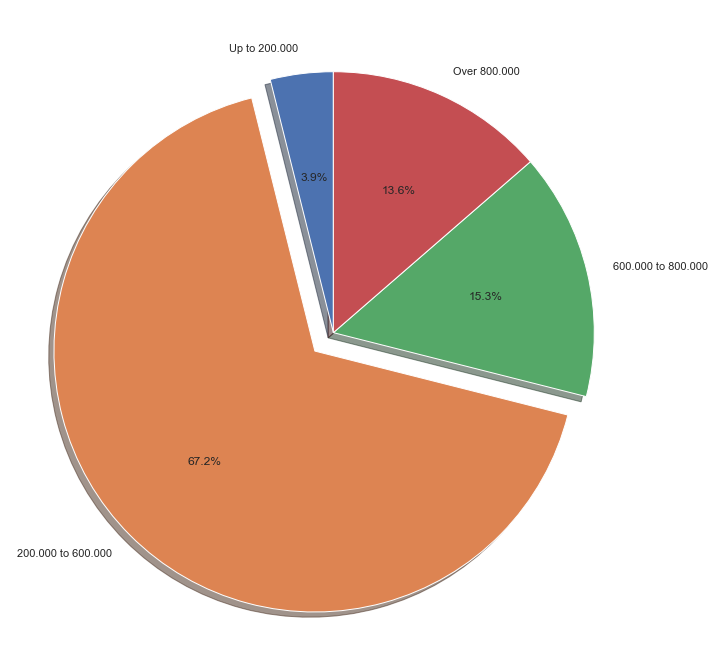

In [31]:

transactions_by_binned_price = data[['binned_price', 'id']].groupby('binned_price').count().reset_index()

transactions_by_binned_price

tot_transactions = transactions_by_binned_price.id.sum()

transactions_by_binned_price['pct'] = transactions_by_binned_price['id'] / tot_transactions * 100
transactions_by_binned_price


labels = ['Up to 200.000', '200.000 to 600.000', '600.000 to 800.000' , 'Over 800.000']
sizes = [transactions_by_binned_price.loc[0:1]['pct'].sum(), transactions_by_binned_price.loc[2:5]['pct'].sum(), 
         transactions_by_binned_price.loc[6:7]['pct'].sum(), transactions_by_binned_price.loc[8:]['pct'].sum()]
explode = (0, 0.1, 0, 0)
sizes

plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)

### The larger the property(living area) the cheaper the square foot.

In [32]:
print(data['sqft_living'].max())
print(data['sqft_living'].min())

13540
290


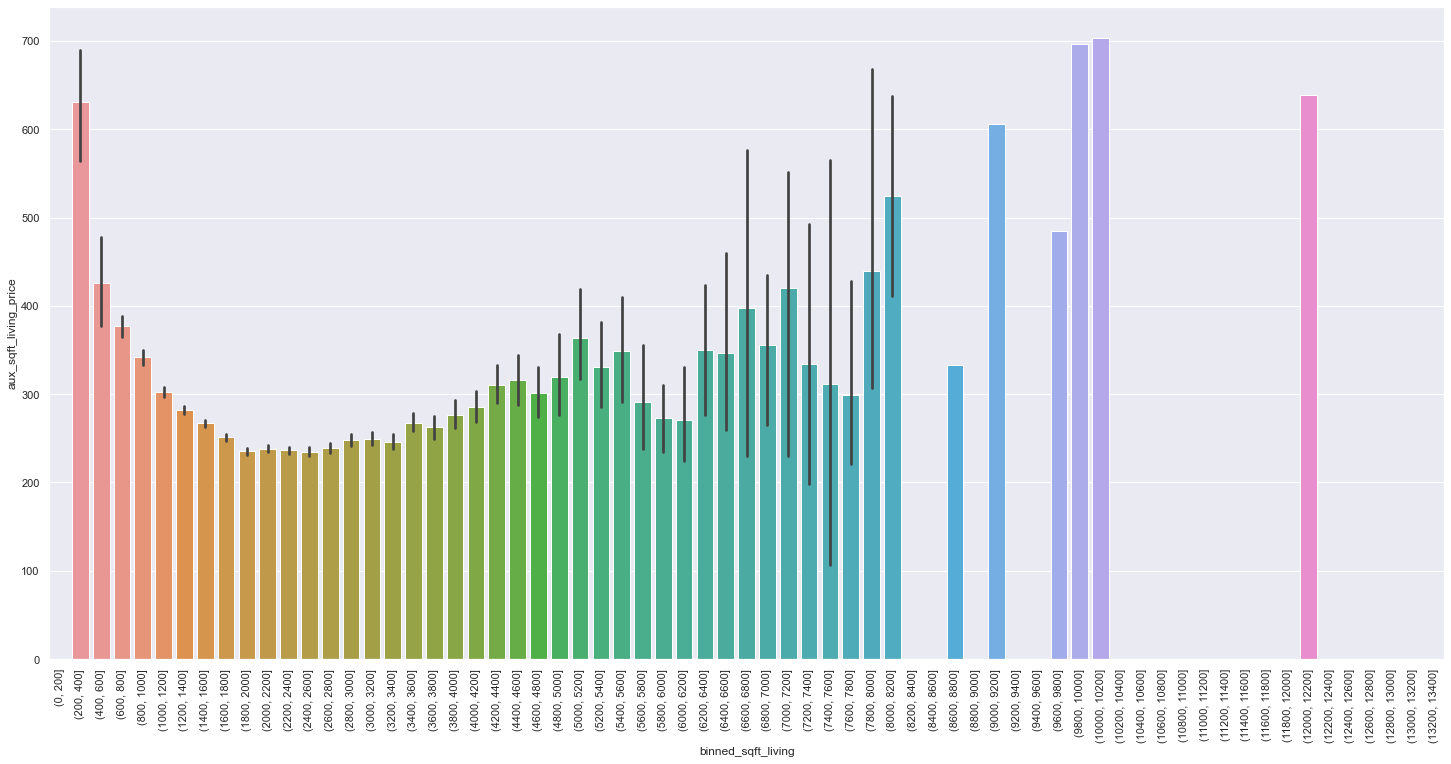

In [33]:
# The larger the property(living area) the cheaper the square foot.

# Average Square foot price according to living size
data.columns

# price_per_sqft_vs_living_size = data[['sqft_living','']]
bins = list(range(0,13600,200))
data['binned_sqft_living'] = pd.cut(data['sqft_living'], bins=bins)

sns.barplot( x = 'binned_sqft_living', y = 'aux_sqft_living_price', data = data)
plt.xticks(rotation = 90);
# data.head()

In [34]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'aux_sqft_living_price',
       'binned_price', 'binned_sqft_living'],
      dtype='object')

In [35]:
data['living_and_lot'] = data['sqft_living'] + data['sqft_lot']

### The larger the property + lot size, the cheaper the square foot

<AxesSubplot:>

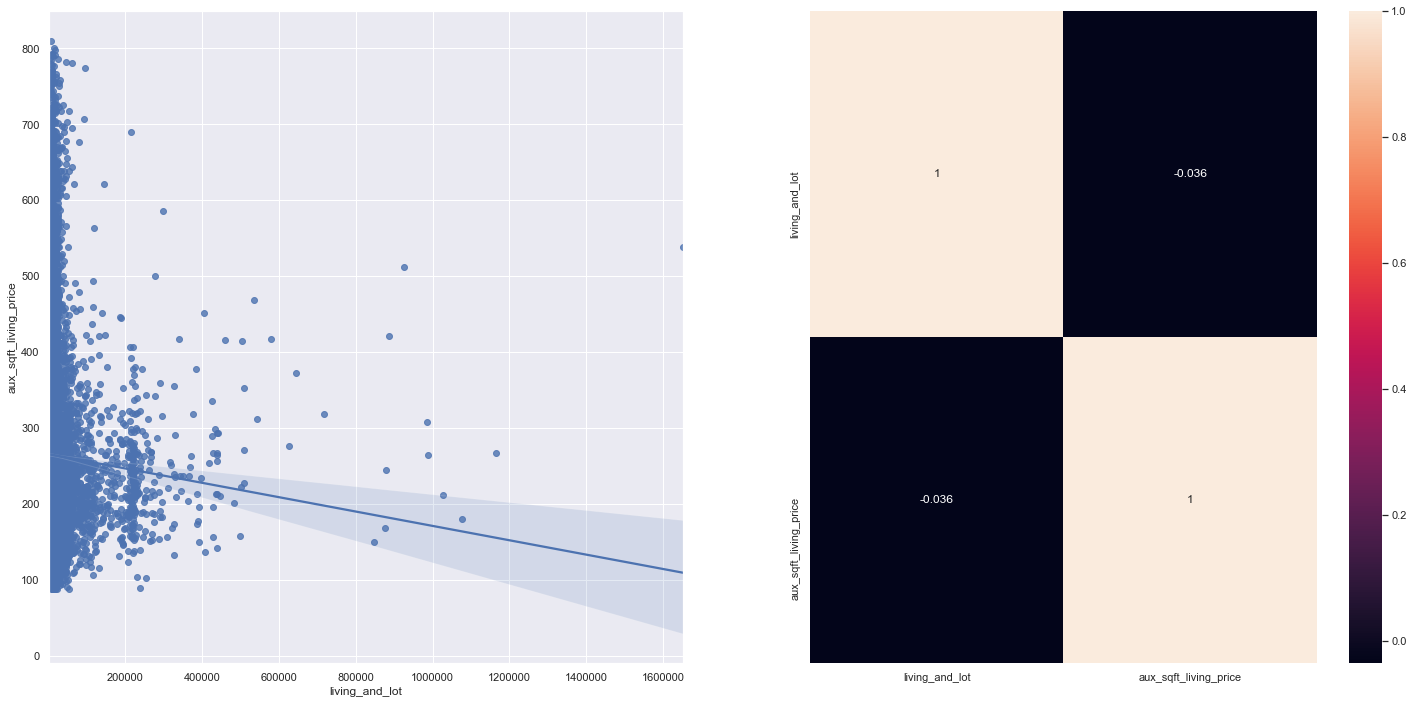

In [36]:
# The larger the property + lot size, the cheaper the square foot

plt.subplot(1,2,1)
sns.regplot(x = 'living_and_lot', y = 'aux_sqft_living_price', data = data)
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(1,2,2)
aux_corr = data[['living_and_lot','aux_sqft_living_price']]
sns.heatmap(aux_corr.corr(method = 'pearson'), annot = True)


### During certain quarters of the year prices are higher

In [37]:
# During certain quarters of the year prices are higher

# Year Season prices
# January, February, and March (Q1)
# April, May, and June (Q2)
# July, August, and September (Q3)
# October, November, and December (Q4)
# needed more data to group by year... just 1y data.
print(data['date'].min())
print(data['date'].max())


data['month'] = pd.to_datetime(data['date']).dt.month

aux_month_average_sales = data[['month', 'aux_sqft_living_price']].groupby('month').mean().reset_index()
aux_month_average_sales['quarter'] = aux_month_average_sales['month'].apply(lambda x: 'Q1' if (x >= 1) & (x <= 3) else
                                                         'Q2' if (x >=4) & (x <= 6) else
                                                         'Q3' if (x >=7) & (x <= 9) else 
                                                         'Q4' if (x >=10) & (x <= 12) else 'na')

aux_month_average_sales
aux_month_average_sales_quarter = aux_month_average_sales[['aux_sqft_living_price', 'quarter']].groupby('quarter').mean().reset_index()
#sns.barplot( x = 'quarter', y = 'aux_sqft_living_price', data ='aux_month_average_sales_quarter' )
aux_month_average_sales_quarter



2014-05-02 00:00:00
2015-05-27 00:00:00


,quarter,aux_sqft_living_price
0,Q1,263.37714
1,Q2,270.84767
2,Q3,259.72305
3,Q4,258.62888


  quarter  aux_sqft_living_price
0      Q1              263.37714
1      Q2              270.84767
2      Q3              259.72305
3      Q4              258.62888


<AxesSubplot:xlabel='quarter', ylabel='aux_sqft_living_price'>

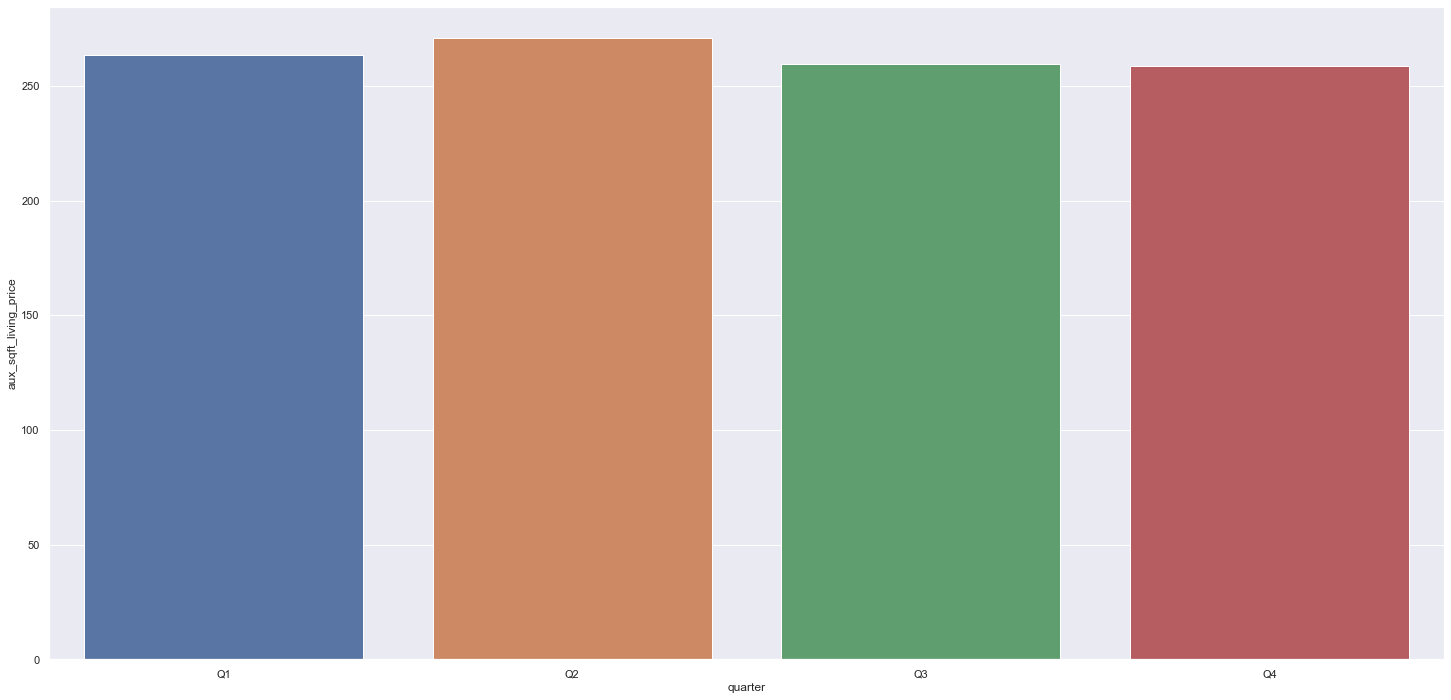

In [38]:
print(aux_month_average_sales_quarter)
sns.barplot( x = 'quarter', y = 'aux_sqft_living_price', data =aux_month_average_sales_quarter )

### aux

In [39]:
data.yr_renovated.unique()


yr_renovated_max = data['yr_renovated'].max() - 20
# data['renovated_last_15y'] = data.apply(lambda x: 1 if ((data['yr_renovated'] - yr_renovated_max) >= 0) else 0, axis = 1)
data['renovated_last_20y'] = data['yr_renovated'].apply(lambda x: 1 if (x-yr_renovated_max) >= 0 else 0)

In [40]:
# aux3 = data[data['renovated_last_15y'] ==1]

In [41]:

# data['pct_renovated_last_15y'] = 


# getting MEAN data
zipcode_avg_price = data[['zipcode','price','sqft_living','aux_sqft_living_price','condition','grade','yr_built']].groupby('zipcode').mean().reset_index()
zipcode_avg_price.rename(columns = {'price':'mean_price', 'sqft_living':'mean_sqft_living', 
                                    'aux_sqft_living_price':'mean_sqft_living_price',
                                   'condition':'mean_condition','grade':'mean_grade','yr_built':'mean_yr_built'}, inplace = True)


# Getting Median Data:
aux4 = data[['zipcode','price','sqft_living','aux_sqft_living_price','yr_built','sqft_lot']].groupby('zipcode').median().reset_index()
aux4.rename(columns = {'price':'median_price','sqft_living':'median_sqft_living','aux_sqft_living_price':'median_aux_sqft_living_price','yr_built':'median_yr_built','sqft_lot':'median_sqft_lot'}, inplace = True)

# COUNTING transactions
aux2 = data[['zipcode','id']].groupby('zipcode').count().reset_index()
aux2.rename(columns = {'id':'transactions'}, inplace = True)


#aux3 = data[['zipcode','id']].groupby('zipcode').count().reset_index()


# issue
# def add_std(zip):
#     print(data[data['zipcode'] == zip].price.std())
#     # return (data[data['zipcode'] == zip].price.std())

# zipcode_avg_price['std_price'] = zipcode_avg_price['zipcode'].apply(lambda x: x['zipcode'])
# data[data['zipcode'] == 98001].price.std()


# standard deviations:
aux = data[['zipcode','price','sqft_living']].groupby('zipcode').std().reset_index()
aux.rename(columns = {'price':'std_price', 'sqft_living': 'std_sqft_living'}, inplace = True)

# renovations last X years
aux3 = data[data['renovated_last_20y'] == 1].groupby('zipcode').count().reset_index()
aux3.rename(columns = {'renovated_last_20y':'count_renovated_last_20y'}, inplace = True)
aux3 = aux3[['zipcode', 'count_renovated_last_20y']]


zipcode_avg_price = zipcode_avg_price.merge(aux, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux2, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux3, on = 'zipcode', how = 'left')
zipcode_avg_price = zipcode_avg_price.merge(aux4, on = 'zipcode', how = 'left')

# zipcode_avg_price['renovation_pct'] = zipcode_avg_price.apply(lambda x: (x['count_renovated_last_20y'] / x['transactions']))
zipcode_avg_price['renovation_pct'] = zipcode_avg_price['count_renovated_last_20y'] / zipcode_avg_price['transactions' ]* 100
zipcode_avg_price
# aux4


,zipcode,mean_price,mean_sqft_living,mean_sqft_living_price,mean_condition,mean_grade,mean_yr_built,std_price,std_sqft_living,transactions,count_renovated_last_20y,median_price,median_sqft_living,median_aux_sqft_living_price,median_yr_built,median_sqft_lot,renovation_pct
0,98001,280804.69061,1900.85635,151.38794,3.33702,7.29558,1980.67956,98979.23009,655.26044,362,2.00000,260000.00000,1822.00000,147.27571,1981.00000,9287.00000,0.55249
1,98002,234284.03518,1627.74372,151.17409,3.74372,6.69347,1967.77387,52041.44866,538.97254,199,1.00000,235000.00000,1570.00000,147.17742,1966.00000,7282.00000,0.50251
2,98003,294111.27857,1928.88214,157.11341,3.37143,7.54286,1976.88571,107597.66224,736.66519,280,1.00000,267475.00000,1780.00000,154.81925,1975.00000,8816.00000,0.35714
3,98004,1355927.08202,2909.02208,475.43561,3.49527,8.68770,1971.47003,745820.08941,1308.36863,317,24.00000,1150000.00000,2660.00000,456.94444,1965.00000,11119.00000,7.57098
4,98005,810164.87500,2656.80357,314.92923,3.69643,8.48810,1969.74405,268753.72025,908.31980,168,2.00000,765475.00000,2505.00000,316.21385,1967.00000,12220.00000,1.19048
5,98006,859684.77912,2888.29518,299.09148,3.65863,8.79518,1978.72088,445911.56914,1170.73052,498,14.00000,760184.50000,2720.00000,288.23292,1978.00000,10447.50000,2.81124
6,98007,617105.08511,2182.05674,290.04902,3.63121,7.96454,1971.07092,199940.18481,733.76185,141,4.00000,555000.00000,2090.00000,289.58621,1965.00000,9000.00000,2.83688
7,98008,645507.37809,2133.44523,301.71773,3.66784,7.65371,1966.32509,421589.95460,855.14207,283,5.00000,545000.00000,1980.00000,291.93548,1964.00000,8713.00000,1.76678
8,98010,423665.99000,2137.59000,210.09536,3.53000,7.40000,1979.18000,195414.98276,955.46879,100,4.00000,359999.50000,1902.00000,194.21119,1988.50000,19727.00000,4.00000
9,98011,490351.46667,2253.09744,225.98724,3.22051,7.77436,1982.14872,121846.65822,712.61315,195,2.00000,470000.00000,2200.00000,221.10429,1983.00000,8947.00000,1.02564


### Regions where the renovation rate is higher tend to have a higher price.

In [42]:
data.yr_renovated.unique()

yr_renovated_comparison = data[['yr_renovated','aux_sqft_living_price']].groupby('yr_renovated').median().reset_index()
yr_renovated_comparison.rename(columns = {'aux_sqft_living_price':'mean_price_renovated','yr_renovated':'year'},inplace = True)
yr_renovated_comparison.set_index(['year'], inplace = True)

yr_renovated_comparison

d_aux = data[data['yr_renovated'] == 0]
yr_not_renovated_comparison = data[['yr_built', 'aux_sqft_living_price']].groupby('yr_built').median().reset_index()
yr_not_renovated_comparison.rename(columns = {'aux_sqft_living_price':'mean_price_not_renovated','yr_built':'year'}, inplace = True)
yr_not_renovated_comparison.set_index(['year'], inplace = True)

yr_renovated_comparison = yr_renovated_comparison.merge(yr_not_renovated_comparison , how = 'inner', left_on='year', right_on='year')
yr_renovated_comparison['difference_pct'] = ((yr_renovated_comparison['mean_price_renovated'] / yr_renovated_comparison['mean_price_not_renovated'])  -1) *100
yr_renovated_comparison

,mean_price_renovated,mean_price_not_renovated,difference_pct
year,,,
1934,248.62162,258.42697,-3.79424
1940,328.22417,296.62162,10.65416
1944,283.15217,251.58228,12.54854
1945,297.67442,312.50000,-4.74419
1946,355.25685,310.20887,14.52182
1948,405.94059,270.76023,49.92622
1950,200.53584,279.36907,-28.21831
1951,242.10526,301.03627,-19.57605
1953,207.69231,277.99145,-25.28824


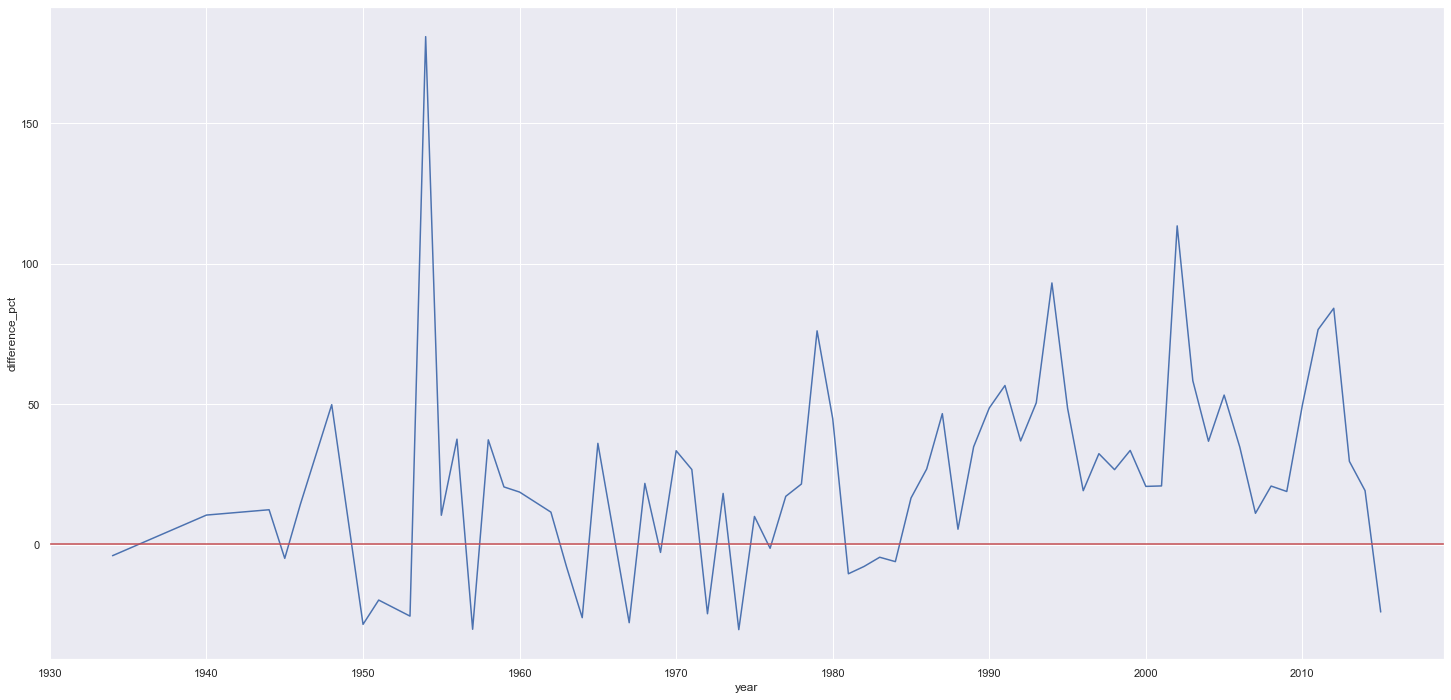

In [43]:
sns.lineplot(y = 'difference_pct', x = yr_renovated_comparison.index ,data = yr_renovated_comparison)
plt.axhline(y=0.5, color='r', linestyle='-')

<AxesSubplot:>

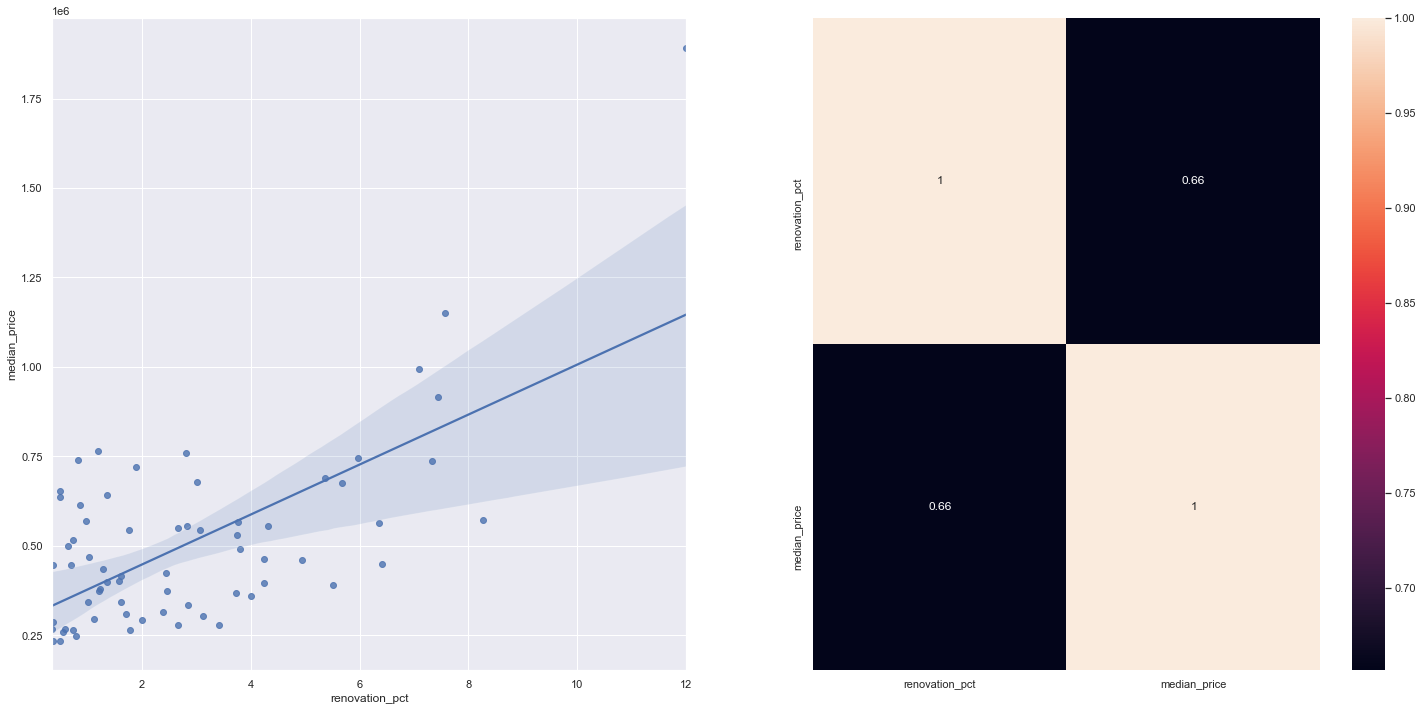

In [44]:
# Regions where the renovation rate is higher tend to have a higher price.
# zipcode_avg_price[['zipcode','renovation_pct','median_price']]
plt.subplot(1,2,1)
sns.regplot(x = 'renovation_pct', y = 'median_price', data =zipcode_avg_price )
plt.subplot(1,2,2)
aux_corr = zipcode_avg_price[['renovation_pct','median_price']]
sns.heatmap(aux_corr.corr(method = 'pearson'), annot = True)

In [45]:
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,aux_sqft_living_price,binned_price,binned_sqft_living,living_and_lot,month,renovated_last_20y
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650,188.05085,"(200000, 300000]","(1000, 1200]",6830,10,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639,209.33852,"(500000, 600000]","(2400, 2600]",9812,12,0
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062,233.76623,"(100000, 200000]","(600, 800]",10770,2,0


### Properties that are more than 30 years old sell for higher price after renovation(last 20y)

In [46]:
# Properties that are more than 30 years old sell for higher price after renovation

older_prop = data['yr_built'].max() - 30
aux_older_prop = data[data['yr_built'] <= older_prop]

In [47]:
aux2_older_prop = data[data['renovated_last_20y'] == 0]  # not renovated
aux3_older_prop = data[data['renovated_last_20y'] == 1]  # renovated
                 

Not renovated mean price/sqft: 262.50838239581327
Renovated mean: price/sqft: 328.2310443454868
Mean % dif: 25.036405066325116
Not renovated median price/sqft: 243.4240367532756
Renovated median: price/sqft: 311.0723169494587
Median % dif: 27.790304153385037


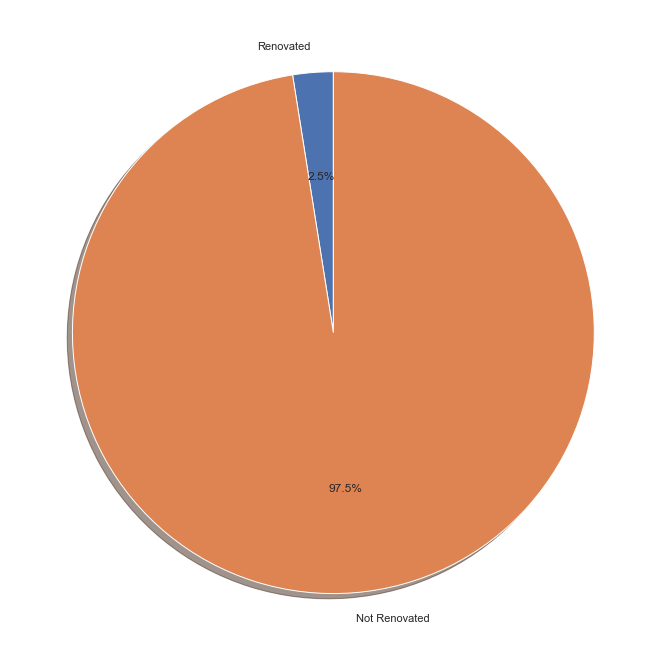

In [48]:
old_renovated = aux3_older_prop.id.count()
old_not_renovated = aux2_older_prop.id.count()


labels = ['Renovated', 'Not Renovated']
sizes = [old_renovated, old_not_renovated]
         

plt.pie(sizes, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=90)

print("Not renovated mean price/sqft: " + str( aux2_older_prop.aux_sqft_living_price.mean()))
print("Renovated mean: price/sqft: " + str( aux3_older_prop.aux_sqft_living_price.mean()))
print("Mean % dif: " + str(  ((aux3_older_prop.aux_sqft_living_price.mean() / aux2_older_prop.aux_sqft_living_price.mean()) - 1) *100 ))
print("Not renovated median price/sqft: " + str( aux2_older_prop.aux_sqft_living_price.median()))
print("Renovated median: price/sqft: " + str( aux3_older_prop.aux_sqft_living_price.median()))
print("Median % dif: " + str(  ((aux3_older_prop.aux_sqft_living_price.median() / aux2_older_prop.aux_sqft_living_price.median()) - 1) *100 ))

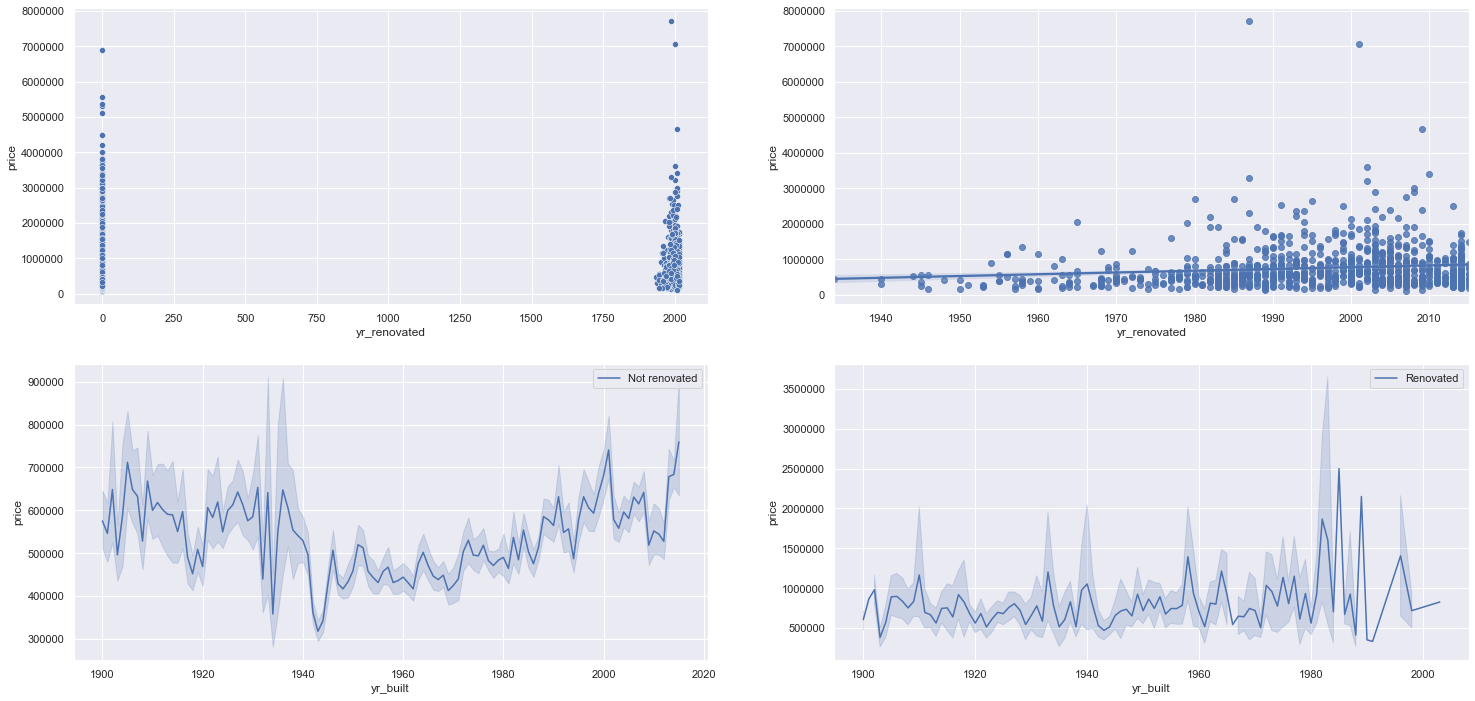

In [49]:
plt.subplot(2,2,1)
sns.scatterplot( x = 'yr_renovated', y = 'price', data = data)
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2,2,2)
aux_plt = data[data['yr_renovated'] > 0]  # Choosing only renovated
sns.regplot( x = 'yr_renovated', y = 'price', data = aux_plt)
plt.ticklabel_format(style='plain', axis='y')


aux2_plt = data[data['yr_renovated'] == 0] # Only non renovated

plt.subplot(2,2,3)
sns.lineplot( x = 'yr_built', y = 'price', label = 'Not renovated', data = aux2_plt) # only not renovated
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(2,2,4)
sns.lineplot( x = 'yr_built', y = 'price', label = 'Renovated' , data = aux_plt) # renovated properties
plt.ticklabel_format(style='plain', axis='y')

# plot price / sqft

# year by year renovation

## Multivariate

### Numerical Attributes

<AxesSubplot:>

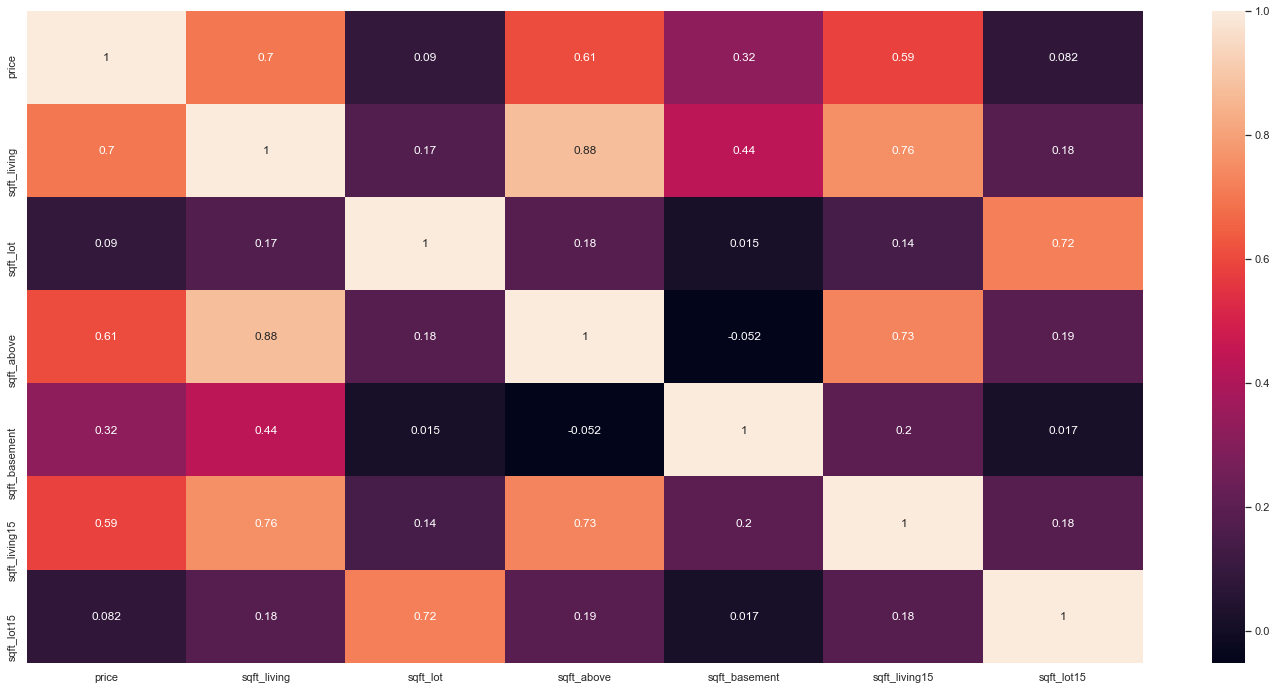

In [50]:
correlation = num_attributes.corr(method = 'pearson')
sns.heatmap(correlation, annot = True)

### Categorical Attributes

In [51]:


cat_attributes.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [52]:
at = cramer_v(cat_attributes['bedrooms'], cat_attributes['bedrooms'])
at

1.0002777263594653

<AxesSubplot:>

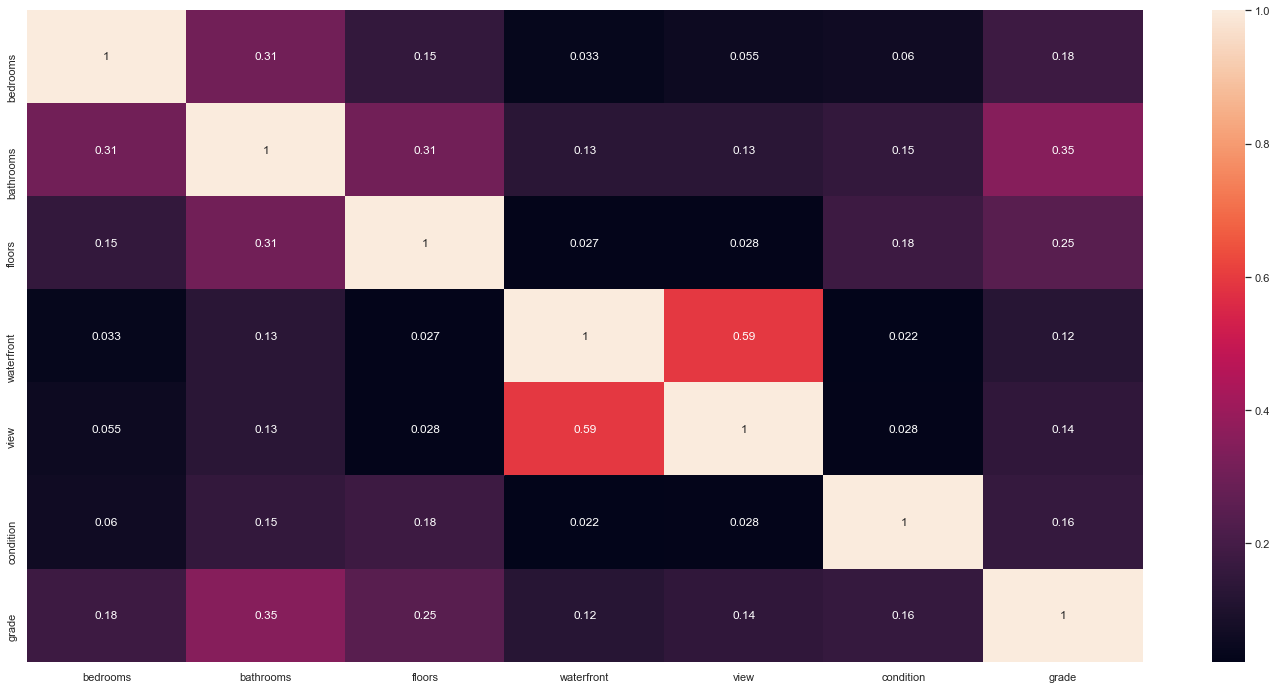

In [53]:

list_to_cramer = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade']

cramer_df = pd.DataFrame()

for item in list_to_cramer:
    data_list = []
    for subitem in list_to_cramer:
        at = cramer_v(cat_attributes[item], cat_attributes[subitem])
        data_list.append(at)
    cramer_df_temp = pd.DataFrame()
    cramer_df_temp = cramer_df_temp.assign(item=data_list)
    cramer_df_temp.rename(columns = {'item':item} , inplace = True)
#     print(cramer_df_temp)
    cramer_df = pd.concat([cramer_df, cramer_df_temp], axis = 1, ignore_index = False)
cramer_df

# cramer_df_temp

cramer_df = cramer_df.set_index(cramer_df.columns)
sns.heatmap(cramer_df, annot = True)

